## Applied

Problem 7, showing that euclidean distance and correlation as measures of dissimilarity in hierarchical clustering is nearly equivalent

In [5]:
import pandas as pd
import numpy as np
import scipy as sci

from scipy.cluster import hierarchy
from sklearn.cluster import KMeans

In [7]:
arrests = pd.read_csv('USArrests.csv', index_col=0)
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [8]:
from sklearn.preprocessing import scale

In [36]:
np.random.seed(1)
scaledA = pd.DataFrame(scale(arrests), columns = arrests.columns, index = arrests.index)
scaledA.head()

,Murder,Assault,UrbanPop,Rape
Alabama,1.255179,0.790787,-0.526195,-0.003451
Alaska,0.513019,1.118060,-1.224067,2.509424
Arizona,0.072361,1.493817,1.009122,1.053466
Arkansas,0.234708,0.233212,-1.084492,-0.186794
California,0.281093,1.275635,1.776781,2.088814


In [37]:
#importing distance package
from scipy.spatial import distance

In [38]:
eDist = distance.pdist(scaledA, 'euclidean')
cDist = distance.pdist(scaledA, 'correlation')

In [39]:
eDist

array([2.73120406, 2.3168048 , 1.30290503, ..., 2.05150768, 1.90126867,
       1.76234909])

In [40]:
cDist

array([0.71383078, 1.44659478, 0.08774168, ..., 1.77733457, 0.56186761,
       1.3197538 ])

In [41]:
eDist-cDist

array([2.01737327, 0.87021001, 1.21516335, ..., 0.27417311, 1.33940106,
       0.44259529])

In [42]:
scaledA.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


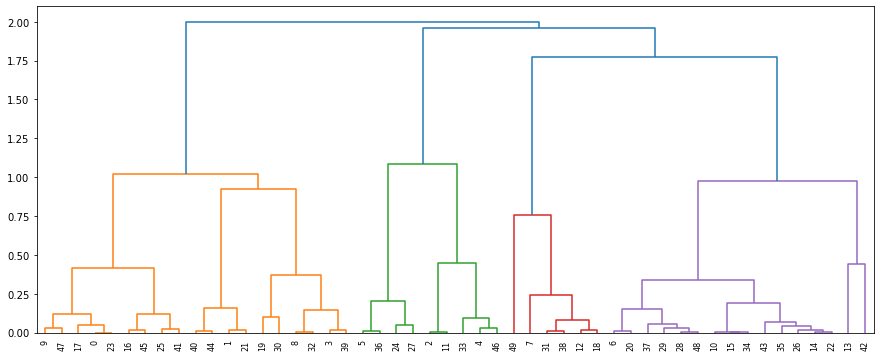

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
hierarchy.dendrogram(hierarchy.complete(cDist))
plt.show()

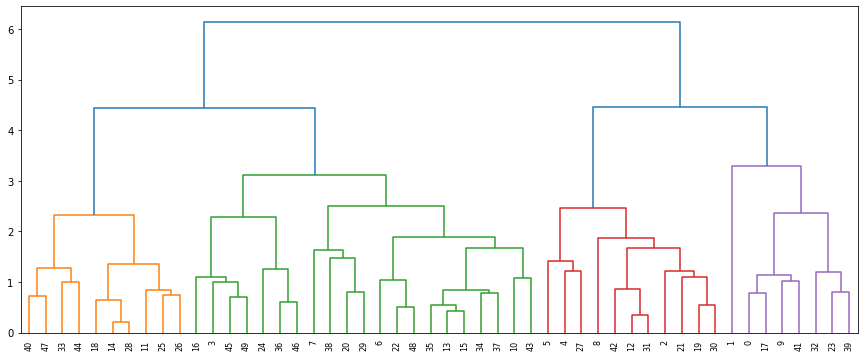

In [44]:
plt.figure(figsize=(15,6))
hierarchy.dendrogram(hierarchy.complete(eDist))
plt.show()

In [45]:
a= eDist**2
b= 1-cDist

In [46]:
pd.Series(a).describe()

count    1225.000000
mean        8.163265
std         6.680897
min         0.043241
25%         2.936325
50%         6.223988
75%        11.645657
max        37.679156
dtype: float64

In [47]:
pd.Series(b).describe()

count    1225.000000
mean       -0.012157
std         0.644683
min        -0.999277
25%        -0.637623
50%         0.005661
75%         0.584046
max         0.999859
dtype: float64

In [48]:
pd.Series(b/a).describe()

count    1225.000000
mean        0.107802
std         0.787832
min        -1.715923
25%        -0.064131
50%         0.000929
75%         0.112744
max        22.382949
dtype: float64

### Problem 9

##### a

In [50]:
arrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


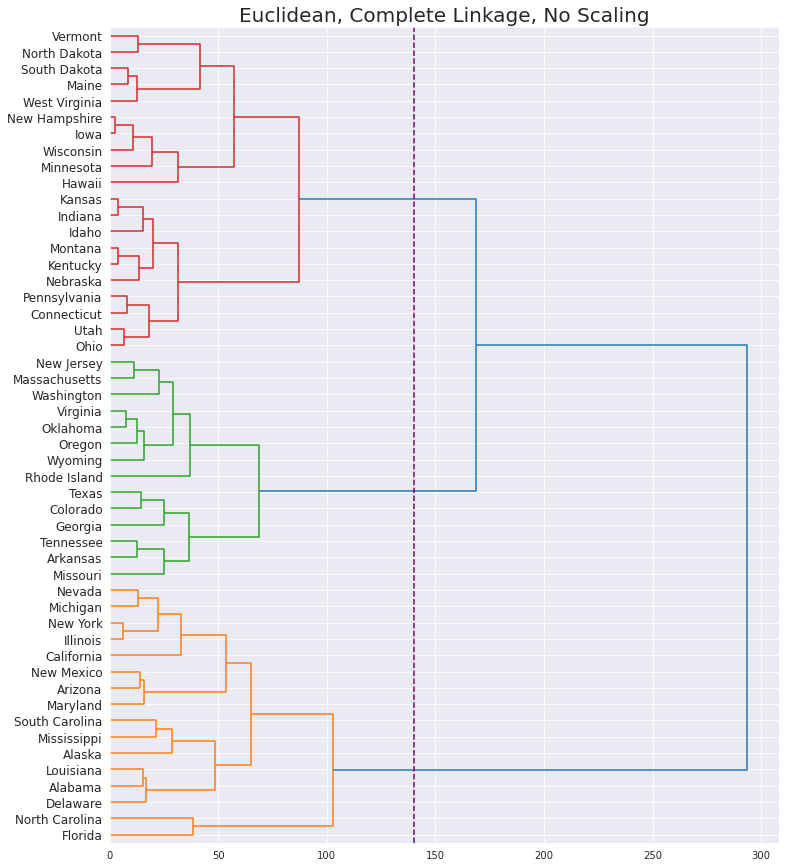

In [78]:
#complete linkage, euclidean dissimilarity hierarchical
import seaborn as sns
sns.set_style('darkgrid')
plt.figure(figsize=(12,15))
compEU = hierarchy.dendrogram(hierarchy.complete(arrests), 
            orientation = 'right', color_threshold = 150, 
            labels=arrests.index)
plt.title('Euclidean, Complete Linkage, No Scaling', fontsize =20)
plt.axvline(140, linestyle='dashed', c='purple')
#setting label fontsize
plt.tick_params(axis='y', which='major', labelsize=12)
plt.show()

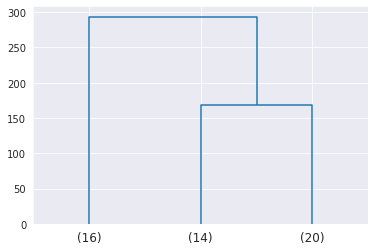

In [84]:
#dendro cut summary
hierarchy.dendrogram(hierarchy.complete(arrests),
                    truncate_mode='lastp', p=3, show_leaf_counts=True, color_threshold=0);

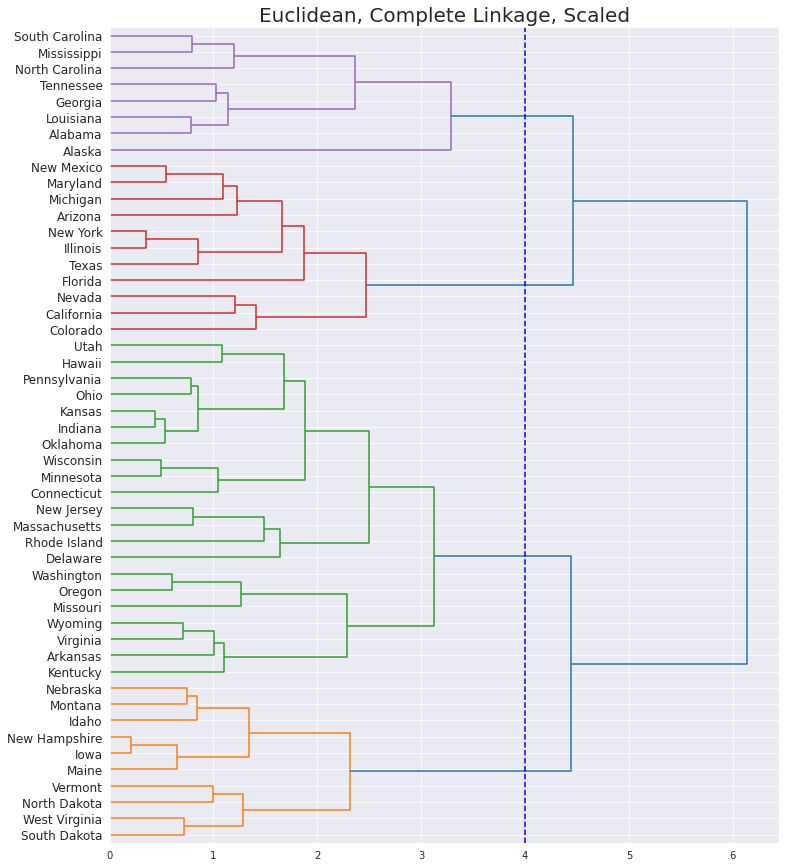

In [88]:
#same cluster method after scaling
plt.figure(figsize=(12,15))
compEU = hierarchy.dendrogram(hierarchy.complete(scaledA), 
            orientation = 'right', color_threshold = 4, 
            labels=arrests.index)
plt.title('Euclidean, Complete Linkage, Scaled', fontsize =20)
plt.axvline(4, linestyle='dashed', c='blue')
#setting label fontsize
plt.tick_params(axis='y', which='major', labelsize=12)
plt.show()

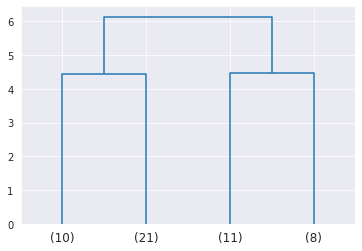

In [90]:
#dendro cut summary
hierarchy.dendrogram(hierarchy.complete(scaledA),
                    truncate_mode='lastp', p=4, show_leaf_counts=True, color_threshold=0);

Text(0.5, 1.0, 'Scaled')

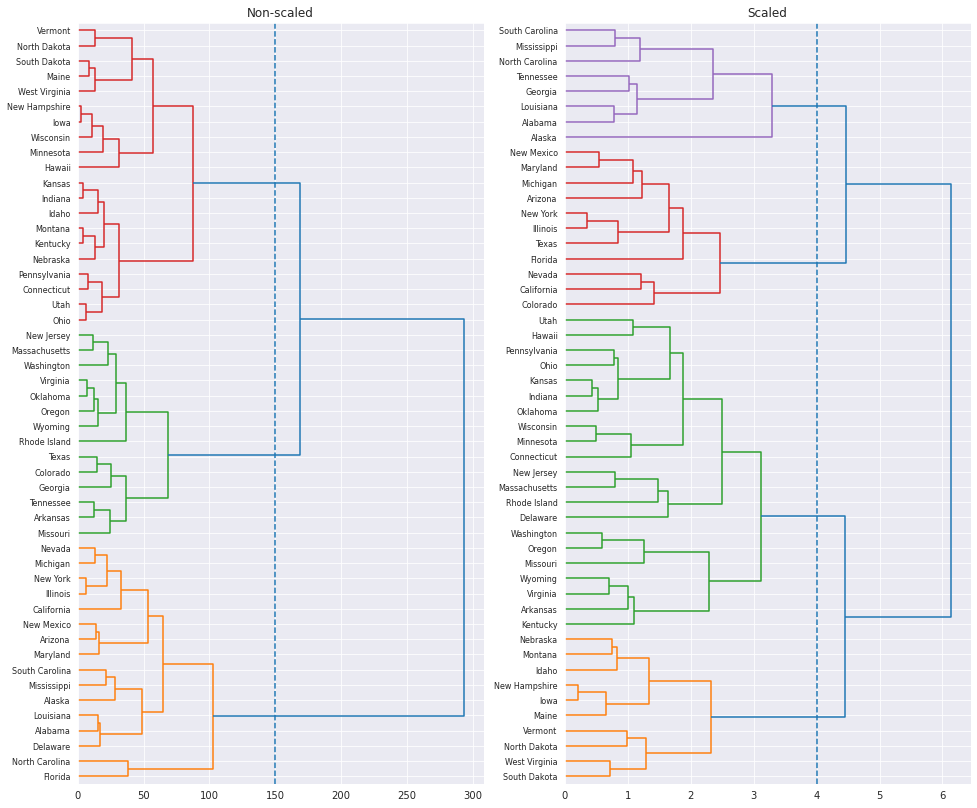

In [109]:
#comparing the two side by side
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,14))
#non-scaed
hierarchy.dendrogram(hierarchy.complete(arrests), ax=ax1, orientation='right', labels=arrests.index, 
                     color_threshold = 150)
ax1.axvline(150, linestyle='dashed')
ax1.set_title('Non-scaled')

#scaled
hierarchy.dendrogram(hierarchy.complete(scaledA), ax=ax2, orientation='right', labels=arrests.index,
                    color_threshold =4);
ax2.axvline(4,linestyle='dashed')
ax2.set_title('Scaled')

## Let's run PCA on the data and plot the clusters based on what we found in the hierarchical clustering

I'm curious to see on what dimensions the hierarchical clusters grouped the clusters

In [110]:
#importing PCA
from sklearn.decomposition import PCA
pca = PCA()

In [111]:
#creating df of loading vectors
df_loadings = pd.DataFrame(pca.fit(scaledA).components_.T, 
                index = arrests.columns, 
                columns = ['PC1','PC2','PC3','PC4'])
df_loadings

,PC1,PC2,PC3,PC4
Murder,0.535899,0.418181,-0.341233,0.649228
Assault,0.583184,0.187986,-0.268148,-0.743407
UrbanPop,0.278191,-0.872806,-0.378016,0.133878
Rape,0.543432,-0.167319,0.817778,0.089024


again we can see that PC1 is roughly a measure of violent crime and PC2 covers population. (and that crime isn't particularly correlated with population)

In [115]:
#pc scores for observations
df_pc_scores = pd.DataFrame(pca.fit_transform(scaledA),
                            index = arrests.index, 
                            columns = ['PC1', 'PC2', 'PC3', 'PC4'])
df_pc_scores.head(5)

,PC1,PC2,PC3,PC4
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [146]:
#nonscaled hierarchy labels at 3 clusters
nonScale3 = hierarchy.cut_tree(hierarchy.complete(arrests), n_clusters=3)
nonScaleDf = pd.DataFrame(nonScale3)
t= pd.Series(nonScaleDf[0]).values

In [147]:
#converted scores DF
plotScoresNS = df_pc_scores.loc[:,['PC1','PC2']]
#multiplyingPC2 by -1
plotScoresNS['PC2'] = plotScoresNS['PC2']*-1
plotScoresNS['clusters3'] = t
plotScoresNS

,PC1,PC2,clusters3
Alabama,0.985566,-1.133392,0
Alaska,1.950138,-1.073213,0
Arizona,1.763164,0.745957,0
Arkansas,-0.141420,-1.119797,1
California,2.523980,1.542934,0
Colorado,1.514563,0.987555,1
Connecticut,-1.358647,1.088928,2
Delaware,0.047709,0.325359,0
Florida,3.013042,-0.039229,0
Georgia,1.639283,-1.278942,1


In [186]:
#scaled hierarchy labels at 4 clusters
scale4 = hierarchy.cut_tree(hierarchy.complete(scaledA), n_clusters=4)
scaleDf = pd.DataFrame(scale4)
s= pd.Series(scaleDf[0]).values

In [188]:
#converted scores DF
scoresScaled = df_pc_scores.loc[:,['PC1','PC2']]
#multiplyingPC2 by -1
scoresScaled['PC2'] = scoresScaled['PC2']*-1
scoresScaled['clusters4'] = s
scoresScaled

,PC1,PC2,clusters4
Alabama,0.985566,-1.133392,0
Alaska,1.950138,-1.073213,0
Arizona,1.763164,0.745957,1
Arkansas,-0.141420,-1.119797,2
California,2.523980,1.542934,1
Colorado,1.514563,0.987555,1
Connecticut,-1.358647,1.088928,2
Delaware,0.047709,0.325359,2
Florida,3.013042,-0.039229,1
Georgia,1.639283,-1.278942,0


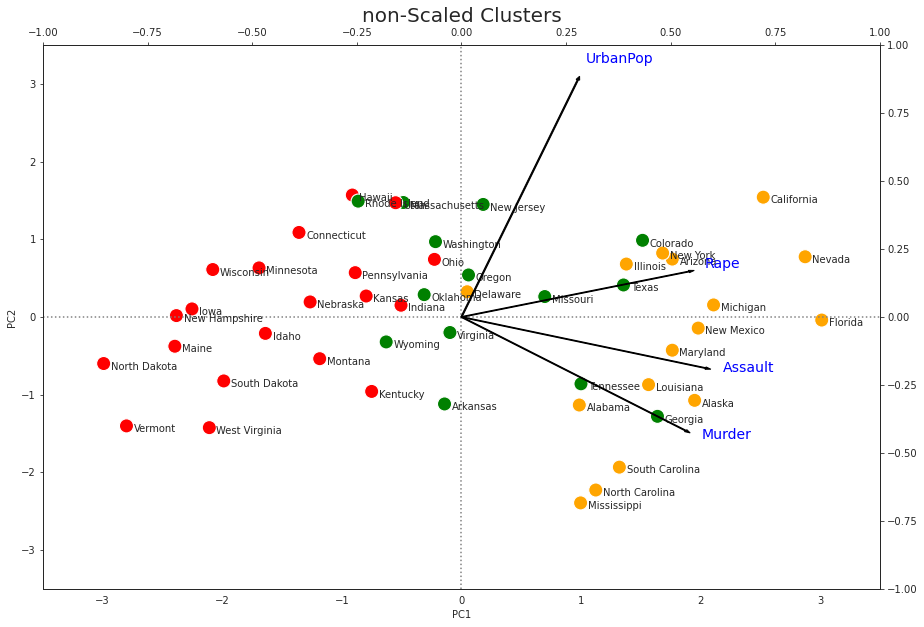

In [185]:
sns.set_style('white')
#plotting the biplot
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2

sns.scatterplot(x=plotScoresNS.PC1,y=plotScoresNS.PC2, ax=ax1, s=200, 
                data = plotScoresNS, hue=plotScoresNS.clusters3, 
                palette =['orange','green','red'], legend=False)

for i in range(50):
    ax1.text(x=plotScoresNS.PC1[i]+0.06, y=plotScoresNS.PC2[i]-0.08, s=plotScoresNS.index[i])

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='blue')

ax1.set_title("non-Scaled Clusters", fontsize=20)

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in df_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(df_loadings.PC1.loc[i]*a,-df_loadings.PC2.loc[i]*a),color='blue', fontsize=14)

#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')
#plot vectors
ax2.arrow(0,0,df_loadings.PC1[0], -df_loadings.PC2[0], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[1], -df_loadings.PC2[1], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[2], -df_loadings.PC2[2], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[3], -df_loadings.PC2[3], width=0.003, color='black');    

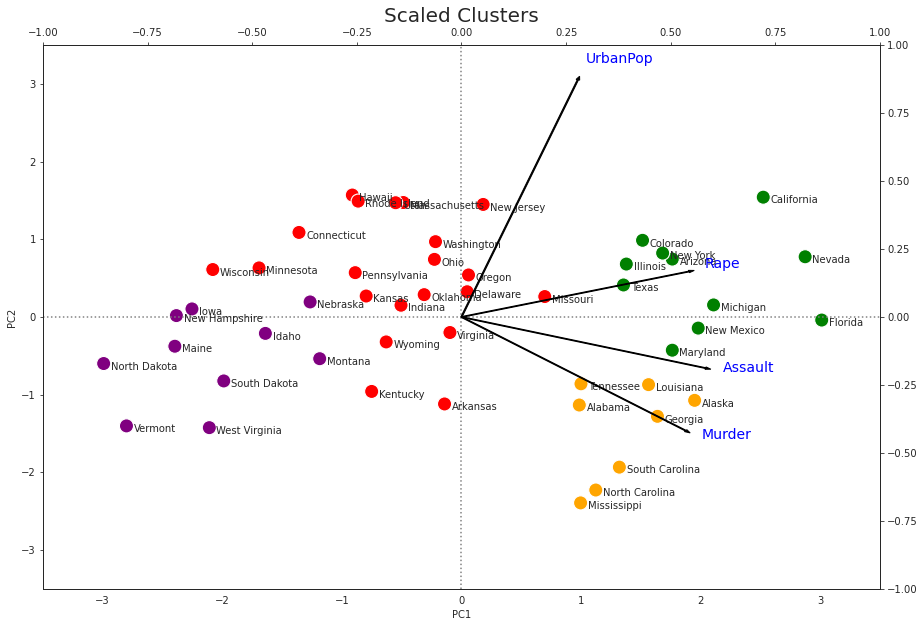

In [189]:
#plotting the biplot
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2
sns.scatterplot(x=scoresScaled.PC1,y=scoresScaled.PC2, ax=ax1, s=200, 
                data = scoresScaled, hue=scoresScaled.clusters4, 
                palette =['orange','green','red','purple'], legend=False)
#plotting State names
for i in range(50):
    ax1.text(x=scoresScaled.PC1[i]+0.06, y=scoresScaled.PC2[i]-0.08, s=scoresScaled.index[i])

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='blue')

ax1.set_title("Scaled Clusters", fontsize=20)

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in df_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(df_loadings.PC1.loc[i]*a,-df_loadings.PC2.loc[i]*a),color='blue', fontsize=14)

#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')
#plot vectors
ax2.arrow(0,0,df_loadings.PC1[0], -df_loadings.PC2[0], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[1], -df_loadings.PC2[1], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[2], -df_loadings.PC2[2], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[3], -df_loadings.PC2[3], width=0.003, color='black');    

### Running a k-means cluster on the principal components

In [190]:
from sklearn.cluster import KMeans

In [191]:
np.random.seed(1)

In [200]:
#just first two components
pc1pc2_scores = df_pc_scores.loc[:,['PC1','PC2']]
pc1pc2_scores['PC2'] = -df_pc_scores.loc[:,'PC2']
model3 = KMeans(n_clusters=3, n_init=50)
model3.fit(pc1pc2_scores)

KMeans(n_clusters=3, n_init=50)

In [201]:
clust3Labels = model3.labels_
pc1pc2_scores['clust3Labels'] = clust3Labels
pc1pc2_scores

,PC1,PC2,clust3Labels
Alabama,0.985566,-1.133392,2
Alaska,1.950138,-1.073213,2
Arizona,1.763164,0.745957,2
Arkansas,-0.141420,-1.119797,0
California,2.523980,1.542934,2
Colorado,1.514563,0.987555,2
Connecticut,-1.358647,1.088928,0
Delaware,0.047709,0.325359,0
Florida,3.013042,-0.039229,2
Georgia,1.639283,-1.278942,2


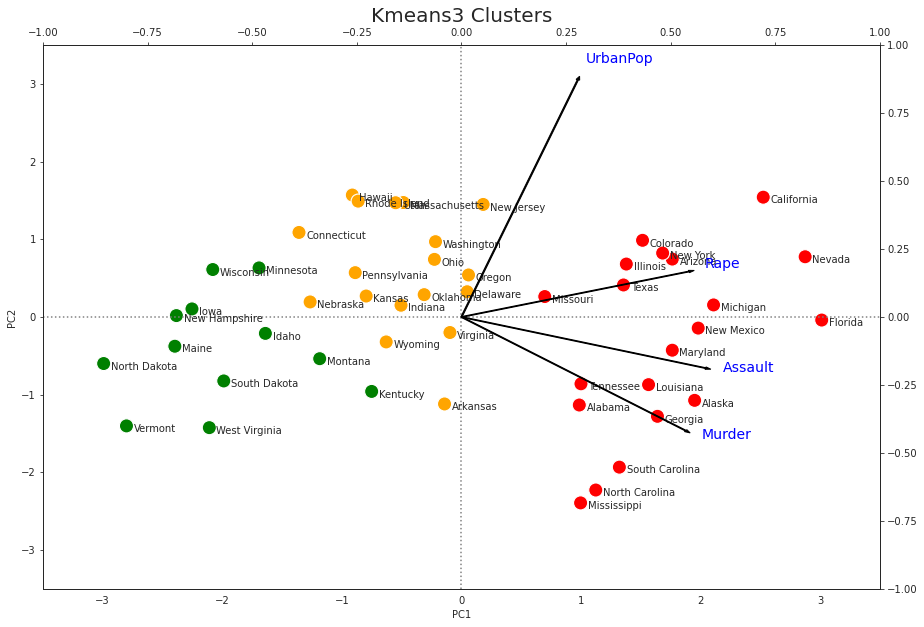

In [202]:
#plotting the biplot
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2
sns.scatterplot(x=pc1pc2_scores.PC1,y=pc1pc2_scores.PC2, ax=ax1, s=200, 
                data = pc1pc2_scores, hue=pc1pc2_scores.clust3Labels, 
                palette =['orange','green','red',], legend=False)
#plotting State names
for i in range(50):
    ax1.text(x=pc1pc2_scores.PC1[i]+0.06, y=pc1pc2_scores.PC2[i]-0.08, s=scoresScaled.index[i])

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='blue')

ax1.set_title("Kmeans3 Clusters", fontsize=20)

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in df_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(df_loadings.PC1.loc[i]*a,-df_loadings.PC2.loc[i]*a),color='blue', fontsize=14)

#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')
#plot vectors
ax2.arrow(0,0,df_loadings.PC1[0], -df_loadings.PC2[0], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[1], -df_loadings.PC2[1], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[2], -df_loadings.PC2[2], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[3], -df_loadings.PC2[3], width=0.003, color='black');    

In [203]:
model4 = KMeans(n_clusters=4, n_init=50)
model4.fit(pc1pc2_scores)
clust4Labels = model4.labels_
pc1pc2_scores['clust4Labels'] = clust4Labels
pc1pc2_scores

,PC1,PC2,clust3Labels,clust4Labels
Alabama,0.985566,-1.133392,2,2
Alaska,1.950138,-1.073213,2,2
Arizona,1.763164,0.745957,2,0
Arkansas,-0.141420,-1.119797,0,1
California,2.523980,1.542934,2,0
Colorado,1.514563,0.987555,2,0
Connecticut,-1.358647,1.088928,0,1
Delaware,0.047709,0.325359,0,1
Florida,3.013042,-0.039229,2,0
Georgia,1.639283,-1.278942,2,2


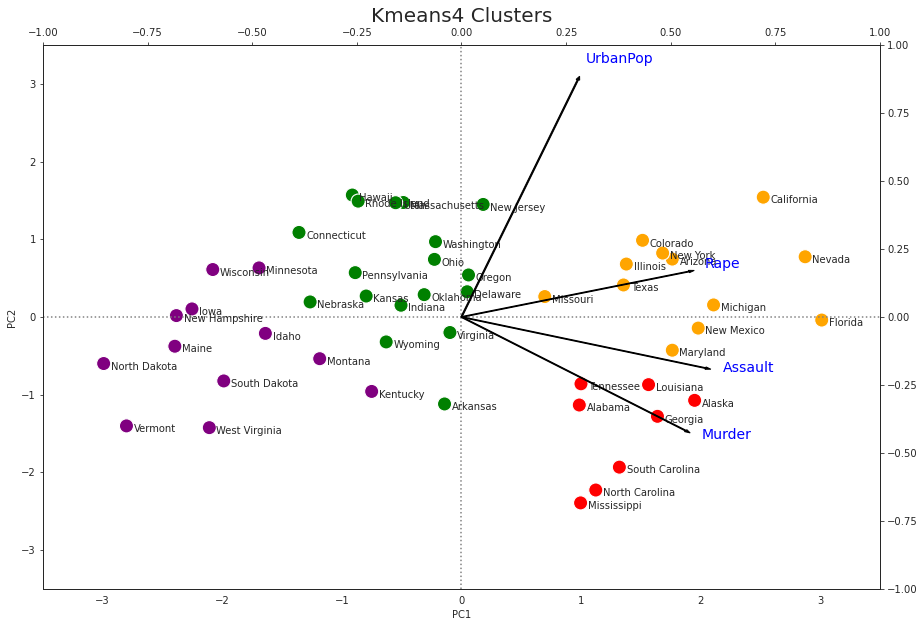

In [206]:
#plotting the biplot
fig, ax1 = plt.subplots(figsize=(15,10))

#setting the axes
#setting the axes
ax1.set_xlim(-3.5,3.5)
ax1.set_ylim(-3.5,3.5)

#plotting Principal Components 1 and 2
sns.scatterplot(x=pc1pc2_scores.PC1,y=pc1pc2_scores.PC2, ax=ax1, s=200, 
                data = pc1pc2_scores, hue=pc1pc2_scores.clust4Labels, 
                palette =['orange','green','red','purple'], legend=False)
#plotting State names
for i in range(50):
    ax1.text(x=pc1pc2_scores.PC1[i]+0.06, y=pc1pc2_scores.PC2[i]-0.08, s=scoresScaled.index[i])

##plot second set of axes for the loading vectors
ax2 = ax1.twinx().twiny()
#setting limits on 2nd pair axes
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='blue')

ax1.set_title("Kmeans4 Clusters", fontsize=20)

#Plot labels for vectors, Variable 'a' is a small offset parametrer to separate arrow tip and text
a =1.07
for i in df_loadings[['PC1','PC2']].index:
    ax2.annotate(i,(df_loadings.PC1.loc[i]*a,-df_loadings.PC2.loc[i]*a),color='blue', fontsize=14)

#plotting center axis reference llines
ax1.hlines(0,-3.5,3.5, linestyles='dotted', colors='grey')
ax1.vlines(0,-3.5,3.5, linestyles='dotted',colors='grey')
#plot vectors
ax2.arrow(0,0,df_loadings.PC1[0], -df_loadings.PC2[0], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[1], -df_loadings.PC2[1], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[2], -df_loadings.PC2[2], width=0.003, color='black')
ax2.arrow(0,0,df_loadings.PC1[3], -df_loadings.PC2[3], width=0.003, color='black');    